In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def lno_data(data):
      new_data = []
      lines = data.splitlines()
      for line in lines:
            columns = line.split()
            if len(columns)>1:
                  if not line.startswith("#"): 
                        new_data.append(columns)

      new_data = np.array(new_data)

      lno_thresh = []
      for i in range(new_data.shape[0]):
            thresh_vir = new_data[:,0][i].split(sep=',')[1]
            thresh_vir = float(thresh_vir.strip('(),'))
            lno_thresh.append(thresh_vir)

      lno_data = np.array(new_data[:,1:],dtype="float32")

      lno_thresh = np.array(lno_thresh,dtype="float32")
      lno_qmc_corr = lno_data[:,0]
      lno_qmc_err = lno_data[:,1]
      lno_qmc_p2_corr = lno_data[:,2]

      return lno_thresh,lno_qmc_corr,lno_qmc_err,lno_qmc_p2_corr

In [4]:
# H40 a=d=1.831
# converged SCF energy = -21.0019645737223
# E(RCCSD) = -21.62210834629252  E_corr = -0.6201437725701879
# RCCSD(T) correction = -0.0176994487844547
# ccsd(t) energy: -21.639807795076976
# AFQMC energy: -21.6382 +/- 0.0004
# DMRG energy (extrapolated) =  -21.646735579929590 +/-    0.0000000000
e_mf = -21.0019645737223
ccsd_corr = -0.6201437725701879
ccsd_t_corr = -21.639807795076976 - e_mf
afqmc_corr = -21.6382 - e_mf
afqmc_err = 0.0004
dmrg_corr = -21.646735579929590 - e_mf
data='''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -0.565535       0.000062        -0.603066       -0.565026       -0.524762       0.000699        -0.040773       0.000690        7.30    8       5.20    6       1268.71
 (3.00e-04,3.00e-05)     -0.596444       0.000056        -0.617165       -0.595470       -0.542530       0.000806        -0.053917       0.000792        9.20    10      5.80    6       1359.84
 (1.00e-04,1.00e-05)     -0.616414       0.000088        -0.622697       -0.613862       -0.533335       0.000673        -0.083080       0.000627        12.60   14      9.20    10      1605.46
 (1.00e-05,1.00e-06)     -0.627269       0.000167        -0.628342       -0.620928       -0.493990       0.000718        -0.133283       0.000588        20.70   25      15.40   18      2238.13
 (1.00e-06,1.00e-07)     -0.629197       0.000279        -0.629316       -0.620918       -0.443499       0.000631        -0.185700       0.000448        28.80   35      23.80   30      3431.70
 (1.00e-07,1.00e-08)     -0.630967       0.000400        -0.630976       -0.620352       -0.402995       0.000529        -0.227973       0.000302        35.30   40      32.20   40      4984.68
 (1.00e-08,1.00e-09)     -0.633722       0.000437        -0.633721       -0.620182       -0.380309       0.000525        -0.253411       0.000382        38.80   40      37.60   40      5997.28
'''
lno_thresh,lno_qmc_corr,lno_qmc_err,lno_qmc_p2_corr \
    = lno_data(data)

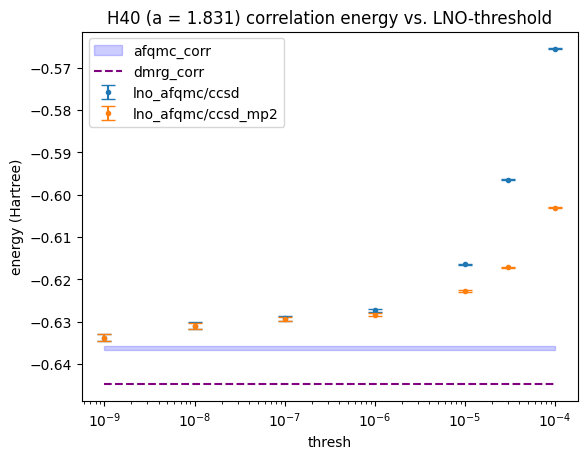

In [7]:
plt.errorbar(
    lno_thresh,lno_qmc_corr,yerr=lno_qmc_err*2,fmt='.',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(
    lno_thresh,lno_qmc_p2_corr,yerr=lno_qmc_err*2,fmt='.',capsize=5,label='lno_afqmc/ccsd_mp2')
# plt.plot(
#     lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err,afqmc_corr-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[dmrg_corr]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H40 (a = 1.831) correlation energy vs. LNO-threshold')
plt.legend()
plt.show()

In [3]:
# H40 a=1.831 d=3
# converged SCF energy = -21.5756025423033
# E(RCCSD) = -22.22585047306383  E_corr = -0.6502479307605629
# RCCSD(T) correction = -0.0010780749331425
# ccsd(t) energy: -22.226928547996973
# AFQMC energy: -22.2245 +/- 0.0004
# DMRG energy (extrapolated) =  -22.227757880107031 +/-    0.0000000000
e_mf = -21.5756025423033
ccsd_corr = -0.6502479307605629
ccsd_t_corr = -22.226928547996973 - e_mf
afqmc_corr = -22.2245 - e_mf
afqmc_err = 0.0004
dmrg_corr = -22.227757880107031 - e_mf
print(ccsd_t_corr)
print(afqmc_corr)
data='''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -0.631204       0.000000        -0.651733       -0.631204       -0.605974       0.001408        -0.025232       0.001408        3.90    4       2.00    2       887.87
 (1.00e-04,1.00e-05)     -0.648868       0.000090        -0.650168       -0.649378       -0.598095       0.001344        -0.050773       0.001268        5.80    6       5.80    6       1160.18
 (1.00e-05,1.00e-06)     -0.650514       0.000099        -0.651319       -0.649799       -0.597384       0.001191        -0.053133       0.001102        7.60    8       5.80    6       1198.37
 (1.00e-06,1.00e-07)     -0.651005       0.000147        -0.651062       -0.650241       -0.572587       0.001023        -0.078415       0.000900        11.10           12      9.40    10      1451.22
 (1.00e-07,1.00e-08)     -0.651501       0.000223        -0.651507       -0.650254       -0.554196       0.001164        -0.097302       0.000997        15.70           18      12.80   14      1695.57
 (1.00e-08,1.00e-09)     -0.651086       0.000223        -0.651087       -0.650254       -0.522256       0.000955        -0.128833       0.000808        21.50           26      19.00   22      2322.37
 (1.00e-09,1.00e-10)     -0.650714       0.000303        -0.650715       -0.650254       -0.495723       0.001050        -0.154987       0.000777        27.30           33      24.40   30      3174.54
 (1.00e-10,1.00e-11)     -0.650418       0.000436        -0.650419       -0.650251       -0.460174       0.000970        -0.190243       0.000618        34.30           39      32.20   38      4712.35
 (0.00e+00,0.00e+00)     -0.648886       0.000530        -0.648887       -0.650251       -0.416728       0.000947        -0.232163       0.000448        40.00           40      40.00   40      6235.24
'''
lno_thresh,lno_qmc_corr,lno_qmc_err,lno_qmc_p2_corr \
    = lno_data(data)
lno_thresh[-1] = 1e-15

-0.6513260056936723
-0.6488974576966982


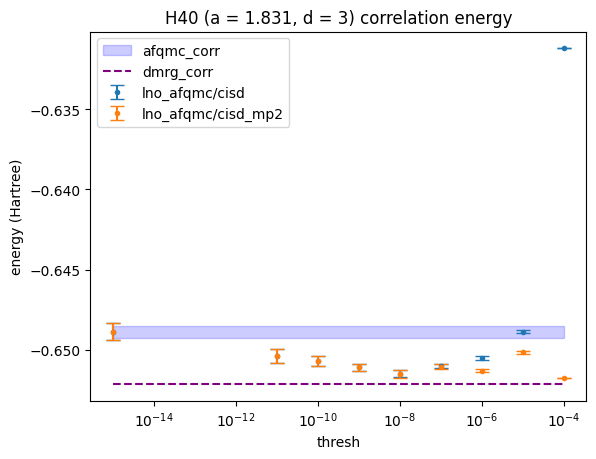

In [4]:
plt.errorbar(
    lno_thresh,lno_qmc_corr,yerr=lno_qmc_err,fmt='.',capsize=5,label='lno_afqmc/cisd')
plt.errorbar(
    lno_thresh,lno_qmc_p2_corr,yerr=lno_qmc_err,fmt='.',capsize=5,label='lno_afqmc/cisd_mp2')
# plt.plot(
#     lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err,afqmc_corr-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[dmrg_corr]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H40 (a = 1.831, d = 3) correlation energy')
plt.legend()
plt.show()